# SQL Task 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Importing the required libraries

import sqlite3
import pandas as pd

In [3]:
# Read the code below and write your observation in the next cell

conn = sqlite3.connect('/content/drive/MyDrive/SQL+EDA/database.sqlite')
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table'")
print(cursor.fetchall())

cursor.execute("PRAGMA table_info('Salaries')")
cols = cursor.fetchall()
for col in cols:
    print(col[1])

[('Salaries',)]
Id
EmployeeName
JobTitle
BasePay
OvertimePay
OtherPay
Benefits
TotalPay
TotalPayBenefits
Year
Notes
Agency
Status


### Read the code above. Write observations here, i.e. what the code is trying to do..

- In every database there always exists metadata regarding the data in a database which is the tablesd,the rows,columns and the no of affected rows and columns.

- So here PRAGMA command is used to extract the metadata in sqlite3


- So the above piece of code is connecting to the sqlite database and trying to fetch the table name from the database and then trying to fetch the metadata related to the Salaries table

In [4]:
# Reading the data from database and storing it in the dataframe

df = pd.read_sql_query("""SELECT * FROM Salaries""", conn)
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411,0,400184,,567595.43,567595.43,2011,,San Francisco,
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966,245132,137811,,538909.28,538909.28,2011,,San Francisco,
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739,106088,16452.6,,335279.91,335279.91,2011,,San Francisco,
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.7,198307,,332343.61,332343.61,2011,,San Francisco,
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134402,9737,182235,,326373.19,326373.19,2011,,San Francisco,


## Q_sample: Who is getting the maximum salary?

In [5]:
# SQLite Implementation

output = pd.read_sql_query("""SELECT MAX(TotalPay) FROM Salaries""", conn)
output

,MAX(TotalPay)
0,567595.43


In [6]:
# Pandas Implementation - 1

max(df.TotalPay)

567595.43

In [7]:
# Pandas Implementation - 2
# Syntax - dataframe.loc[row, index]

df.loc[df.TotalPay == max(df.TotalPay), ['TotalPay']]

,TotalPay
0,567595.43


<h3>
If you observe the above output, it is giving the maximum salary. 

Inorder to understand who is getting the maximum salary look at the next cell. 

Also try to map Pandas .loc syntax with the SQL SELECT Query.
</h3>

In [8]:
# SQLite Implementation

output = pd.read_sql_query("""SELECT * 
                            FROM Salaries 
                            WHERE TotalPay = (SELECT MAX(TotalPay) FROM Salaries)""", conn)
output

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0,400184.25,,567595.43,567595.43,2011,,San Francisco,


In [9]:
# Pandas Implementation

df.loc[df.TotalPay == max(df.TotalPay)]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411,0,400184,,567595.43,567595.43,2011,,San Francisco,


## Now try and answer below mentioned questions using SQL and equivalent Pandas Queries:

1. Retrieve the top 8 rows from the table.
2. What is the average TotalPay?
3. What is the highest amount of BasePay in the dataset?
4. What is the Job title of 'NATHANIEL FORD'?
5. How much 'TotalPayBenefits' is made by 'NATHANIEL FORD'?
6. What was the average (mean) TotalPay of all employees per year? (Output for each year from 2011 to 2014 separately)
7. How many unique jobs are there?
8. What are the top 5 most common jobs?
9. How many people have the word Chief in their job title?



Reference - https://www.sqlitetutorial.net

** Q1:-Retrieve the top 8 rows from the table. **

In [10]:
##Sqllite3 implementation

rows=pd.read_sql_query('SELECT * FROM  Salaries limit 8',conn)
rows

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,,567595.43,567595.43,2011,,San Francisco,
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,,538909.28,538909.28,2011,,San Francisco,
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,,335279.91,335279.91,2011,,San Francisco,
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,,332343.61,332343.61,2011,,San Francisco,
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,,326373.19,326373.19,2011,,San Francisco,
5,6,DAVID SULLIVAN,ASSISTANT DEPUTY CHIEF II,118602.00,8601.00,189082.74,,316285.74,316285.74,2011,,San Francisco,
6,7,ALSON LEE,"BATTALION CHIEF, (FIRE DEPARTMENT)",92492.01,89062.90,134426.14,,315981.05,315981.05,2011,,San Francisco,
7,8,DAVID KUSHNER,DEPUTY DIRECTOR OF INVESTMENTS,256576.96,0.00,51322.50,,307899.46,307899.46,2011,,San Francisco,


In [11]:
##Pandas Implementation
df.head(8)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411,0,400184,,567595.43,567595.43,2011,,San Francisco,
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966,245132,137811,,538909.28,538909.28,2011,,San Francisco,
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739,106088,16452.6,,335279.91,335279.91,2011,,San Francisco,
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.7,198307,,332343.61,332343.61,2011,,San Francisco,
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134402,9737,182235,,326373.19,326373.19,2011,,San Francisco,
5,6,DAVID SULLIVAN,ASSISTANT DEPUTY CHIEF II,118602,8601,189083,,316285.74,316285.74,2011,,San Francisco,
6,7,ALSON LEE,"BATTALION CHIEF, (FIRE DEPARTMENT)",92492,89062.9,134426,,315981.05,315981.05,2011,,San Francisco,
7,8,DAVID KUSHNER,DEPUTY DIRECTOR OF INVESTMENTS,256577,0,51322.5,,307899.46,307899.46,2011,,San Francisco,


** Q2.What is the average TotalPay? **

In [12]:
##Sqllite3 implementation
avgsal=pd.read_sql_query("""select AVG(TotalPay) from Salaries""" ,conn )
avgsal

,AVG(TotalPay)
0,74768.321972


In [18]:
df.TotalPay.mean()

74768.321971703

***Q3.What is the highest amount of BasePay in the dataset?***

In [19]:
pd.read_sql_query("""select (BasePay) from Salaries""",conn)

,BasePay
0,167411
1,155966
2,212739
3,77916
4,134402
...,...
148649,0
148650,Not Provided
148651,Not Provided
148652,Not Provided


In [21]:
pd.read_sql_query("""SELECT max(CAST(BasePay as INT)) as 'MaxBasePay' FROM Salaries """, conn)

,MaxBasePay
0,319275


In [22]:
BS1 = pd.read_sql_query("""SELECT BasePay FROM Salaries""", conn)

In [23]:
l1 = list(df['BasePay'])

In [24]:

import re
l2=[]
for i in l1:
    a=(re.findall(r"[-+]?\d*\.\d+|\d+",str(i)))
    if (a):
        l2.append(float(a[0]))
max(l2)

319275.01

**Q4.What is the Job title of 'NATHANIEL FORD'?**

In [25]:
jobtitle=pd.read_sql_query("""select JobTitle from Salaries where EmployeeName=='NATHANIEL FORD'""",conn)
jobtitle

,JobTitle
0,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY


In [26]:
df.loc[df.EmployeeName=='NATHANIEL FORD']['JobTitle'][0]

'GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY'

***5. How much 'TotalPayBenefits' is made by 'NATHANIEL FORD'?***

In [27]:
total_pay_benifit=pd.read_sql_query("""select SUM(TotalPayBenefits) from Salaries where EmployeeName=='NATHANIEL FORD'""",conn)
total_pay_benifit

,SUM(TotalPayBenefits)
0,567595.43


In [28]:
df.loc[df.EmployeeName=='NATHANIEL FORD']['TotalPayBenefits'][0]

567595.43

***6. What was the average (mean) TotalPay of all employees per year? (Output for each year from 2011 to 2014 separately)***

In [31]:
avg_pay=pd.read_sql_query("""select Year,AVG(TotalPay) from Salaries group by Year""",conn)
avg_pay

,Year,AVG(TotalPay)
0,2011,71744.103871
1,2012,74113.262265
2,2013,77611.443142
3,2014,75463.918140


In [32]:
df.groupby(by='Year')['TotalPay'].mean()

Year
2011    71744.103871
2012    74113.262265
2013    77611.443142
2014    75463.918140
Name: TotalPay, dtype: float64

***7. How many unique jobs are there?***

In [33]:
uniq_jobs=pd.read_sql_query("""select COUNT(distinct(JobTitle)) from Salaries""",conn)
uniq_jobs

,COUNT(distinct(JobTitle))
0,2159


In [34]:
len(df.JobTitle.unique())

2159

***8. What are the top 5 most common jobs?***

In [35]:
common_jobs=pd.read_sql_query("""select JobTitle from Salaries LIMIT 5""",conn)
common_jobs

,JobTitle
0,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY
1,CAPTAIN III (POLICE DEPARTMENT)
2,CAPTAIN III (POLICE DEPARTMENT)
3,WIRE ROPE CABLE MAINTENANCE MECHANIC
4,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)"


In [37]:
df['JobTitle'].value_counts()

Transit Operator                       7036
Special Nurse                          4389
Registered Nurse                       3736
Public Svc Aide-Public Works           2518
Police Officer 3                       2421
                                       ... 
SHELTER OFFICE ASSISTANT SUPERVISOR       1
SENIOR DATA ENTRY OPERATOR                1
Police Services Aide                      1
ACPO,JuvP, Juv Prob (SFERS)               1
ADMINISTRATOR, SFGH MEDICAL CENTER        1
Name: JobTitle, Length: 2159, dtype: int64

## How many people have the word Chief in their job title?

In [38]:
jtc = pd.read_sql_query("""SELECT COUNT(JobTitle) FROM Salaries WHERE JobTitle LIKE '%CHIEF%' """, conn)
jtc

,COUNT(JobTitle)
0,627


In [47]:
contain_values = df[df['JobTitle'].str.contains('CHIEF')]
print (len(contain_values))

204


## EDA

In [48]:
df.isnull().sum()

Id                  0
EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
Notes               0
Agency              0
Status              0
dtype: int64

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148654 non-null  object 
 4   OvertimePay       148654 non-null  object 
 5   OtherPay          148654 non-null  object 
 6   Benefits          148654 non-null  object 
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             148654 non-null  object 
 11  Agency            148654 non-null  object 
 12  Status            148654 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 14.7+ MB


In [50]:
df["BasePay"]

0               167411
1               155966
2               212739
3                77916
4               134402
              ...     
148649               0
148650    Not Provided
148651    Not Provided
148652    Not Provided
148653               0
Name: BasePay, Length: 148654, dtype: object

In [51]:
df[df==0].count()

Id                      0
EmployeeName            0
JobTitle                0
BasePay              1298
OvertimePay         77321
OtherPay            41600
Benefits             1734
TotalPay              368
TotalPayBenefits       30
Year                    0
Notes                   0
Agency                  0
Status                  0
dtype: int64

In [52]:
import numpy as np

In [53]:
cols = ["JobTitle","BasePay","OvertimePay","OtherPay","Benefits","TotalPay","TotalPayBenefits"]
df[cols] = df[cols].replace({'Not provided':np.nan,'Not Provided':np.nan,'':0})

In [54]:
df.isnull().sum()

Id                  0
EmployeeName        0
JobTitle            4
BasePay             4
OvertimePay         4
OtherPay            4
Benefits            4
TotalPay            0
TotalPayBenefits    0
Year                0
Notes               0
Agency              0
Status              0
dtype: int64

In [55]:
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing

Id                  0.000000
EmployeeName        0.000000
JobTitle            0.002691
BasePay             0.002691
OvertimePay         0.002691
OtherPay            0.002691
Benefits            0.002691
TotalPay            0.000000
TotalPayBenefits    0.000000
Year                0.000000
Notes               0.000000
Agency              0.000000
Status              0.000000
dtype: float64

In [56]:
df=df.drop(['TotalPayBenefits','Id'], axis = 1)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   EmployeeName  148654 non-null  object 
 1   JobTitle      148650 non-null  object 
 2   BasePay       148650 non-null  float64
 3   OvertimePay   148650 non-null  float64
 4   OtherPay      148650 non-null  float64
 5   Benefits      148650 non-null  float64
 6   TotalPay      148654 non-null  float64
 7   Year          148654 non-null  int64  
 8   Notes         148654 non-null  object 
 9   Agency        148654 non-null  object 
 10  Status        148654 non-null  object 
dtypes: float64(5), int64(1), object(5)
memory usage: 12.5+ MB


In [59]:
df.dropna(inplace=True)

In [61]:
df.isnull().sum()

EmployeeName    0
JobTitle        0
BasePay         0
OvertimePay     0
OtherPay        0
Benefits        0
TotalPay        0
Year            0
Notes           0
Agency          0
Status          0
dtype: int64

In [63]:
df.tail(10)

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,Year,Notes,Agency,Status
148640,Charlene D Mccully,Parking Control Officer,0.0,0.0,0.00,0.0,0.00,2014,,San Francisco,PT
148641,Raphael Marquis Goins,Museum Guard,0.0,0.0,0.00,0.0,0.00,2014,,San Francisco,PT
148642,Dominic C Marquez,Sign Worker,0.0,0.0,0.00,0.0,0.00,2014,,San Francisco,PT
148643,Kim Brewer,Parking Control Officer,0.0,0.0,0.00,0.0,0.00,2014,,San Francisco,PT
148644,Randy D Winn,"Stationary Eng, Sewage Plant",0.0,0.0,0.00,0.0,0.00,2014,,San Francisco,PT
148645,Carolyn A Wilson,Human Services Technician,0.0,0.0,0.00,0.0,0.00,2014,,San Francisco,PT
148647,Joann Anderson,Communications Dispatcher 2,0.0,0.0,0.00,0.0,0.00,2014,,San Francisco,PT
148648,Leon Walker,Custodian,0.0,0.0,0.00,0.0,0.00,2014,,San Francisco,PT
148649,Roy I Tillery,Custodian,0.0,0.0,0.00,0.0,0.00,2014,,San Francisco,PT
148653,Joe Lopez,"Counselor, Log Cabin Ranch",0.0,0.0,-618.13,0.0,-618.13,2014,,San Francisco,PT


In [64]:
df['Notes'].unique()
df['Notes'].nunique()

1

In [65]:
df['Benefits'].unique()

array([0.000000e+00, 4.443012e+04, 6.981019e+04, ..., 2.200000e-01,
       1.300000e-01, 1.240000e+00])

In [66]:
df['Status'].unique()

array(['', 'PT', 'FT'], dtype=object)

In [67]:
df=df.drop(['Notes'], axis = 1)

In [68]:
df.head(20)

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,Year,Agency,Status
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,0.0,567595.43,2011,San Francisco,
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,0.0,538909.28,2011,San Francisco,
2,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,0.0,335279.91,2011,San Francisco,
3,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,0.0,332343.61,2011,San Francisco,
4,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,0.0,326373.19,2011,San Francisco,
5,DAVID SULLIVAN,ASSISTANT DEPUTY CHIEF II,118602.00,8601.00,189082.74,0.0,316285.74,2011,San Francisco,
6,ALSON LEE,"BATTALION CHIEF, (FIRE DEPARTMENT)",92492.01,89062.90,134426.14,0.0,315981.05,2011,San Francisco,
7,DAVID KUSHNER,DEPUTY DIRECTOR OF INVESTMENTS,256576.96,0.00,51322.50,0.0,307899.46,2011,San Francisco,
8,MICHAEL MORRIS,"BATTALION CHIEF, (FIRE DEPARTMENT)",176932.64,86362.68,40132.23,0.0,303427.55,2011,San Francisco,
9,JOANNE HAYES-WHITE,"CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)",285262.00,0.00,17115.73,0.0,302377.73,2011,San Francisco,


In [69]:
df['OtherPay']=df['OtherPay']+df['Benefits']

In [70]:
df=df.drop(['Benefits'], axis = 1)

In [71]:
df.head(20)

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,TotalPay,Year,Agency,Status
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,567595.43,2011,San Francisco,
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,538909.28,2011,San Francisco,
2,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,335279.91,2011,San Francisco,
3,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,332343.61,2011,San Francisco,
4,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,326373.19,2011,San Francisco,
5,DAVID SULLIVAN,ASSISTANT DEPUTY CHIEF II,118602.00,8601.00,189082.74,316285.74,2011,San Francisco,
6,ALSON LEE,"BATTALION CHIEF, (FIRE DEPARTMENT)",92492.01,89062.90,134426.14,315981.05,2011,San Francisco,
7,DAVID KUSHNER,DEPUTY DIRECTOR OF INVESTMENTS,256576.96,0.00,51322.50,307899.46,2011,San Francisco,
8,MICHAEL MORRIS,"BATTALION CHIEF, (FIRE DEPARTMENT)",176932.64,86362.68,40132.23,303427.55,2011,San Francisco,
9,JOANNE HAYES-WHITE,"CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)",285262.00,0.00,17115.73,302377.73,2011,San Francisco,


In [72]:
type(df['BasePay'][1])

numpy.float64

In [73]:
top_index=max(df[df['Status']==''].index)

In [74]:
top_index

110530

In [75]:
df=df.drop(['Status'], axis = 1)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148650 entries, 0 to 148653
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   EmployeeName  148650 non-null  object 
 1   JobTitle      148650 non-null  object 
 2   BasePay       148650 non-null  float64
 3   OvertimePay   148650 non-null  float64
 4   OtherPay      148650 non-null  float64
 5   TotalPay      148650 non-null  float64
 6   Year          148650 non-null  int64  
 7   Agency        148650 non-null  object 
dtypes: float64(4), int64(1), object(3)
memory usage: 15.2+ MB


In [77]:
df[["BasePay","OvertimePay","OtherPay","TotalPay"]]=df[["BasePay","OvertimePay","OtherPay","TotalPay"]].apply(pd.to_numeric)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148650 entries, 0 to 148653
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   EmployeeName  148650 non-null  object 
 1   JobTitle      148650 non-null  object 
 2   BasePay       148650 non-null  float64
 3   OvertimePay   148650 non-null  float64
 4   OtherPay      148650 non-null  float64
 5   TotalPay      148650 non-null  float64
 6   Year          148650 non-null  int64  
 7   Agency        148650 non-null  object 
dtypes: float64(4), int64(1), object(3)
memory usage: 15.2+ MB


In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

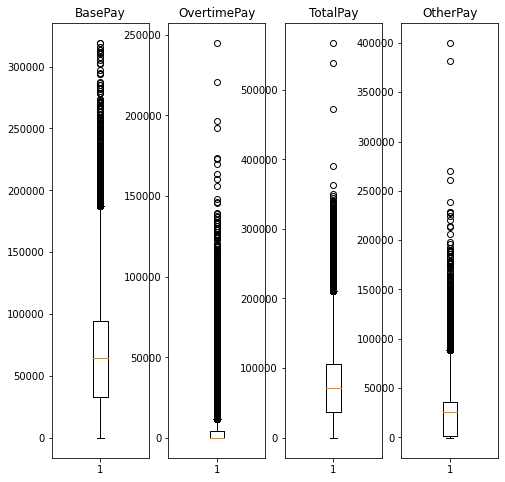

In [80]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(8,8))
axes[0].boxplot(df['BasePay'])
axes[0].set_title('BasePay')
axes[1].boxplot(df['OvertimePay'])
axes[1].set_title('OvertimePay')
axes[2].boxplot(df['TotalPay'])
axes[2].set_title('TotalPay')
axes[3].boxplot(df['OtherPay'])
axes[3].set_title('OtherPay')


fig.savefig("boxplots.png")

In [81]:
num_var=[]
cat_var=[]
for i in df.columns:
    if (df[i].dtypes=='object'):
        cat_var.append(i)
    else:
        num_var.append(i)

In [82]:
num_var

['BasePay', 'OvertimePay', 'OtherPay', 'TotalPay', 'Year']

In [83]:
cat_var

['EmployeeName', 'JobTitle', 'Agency']

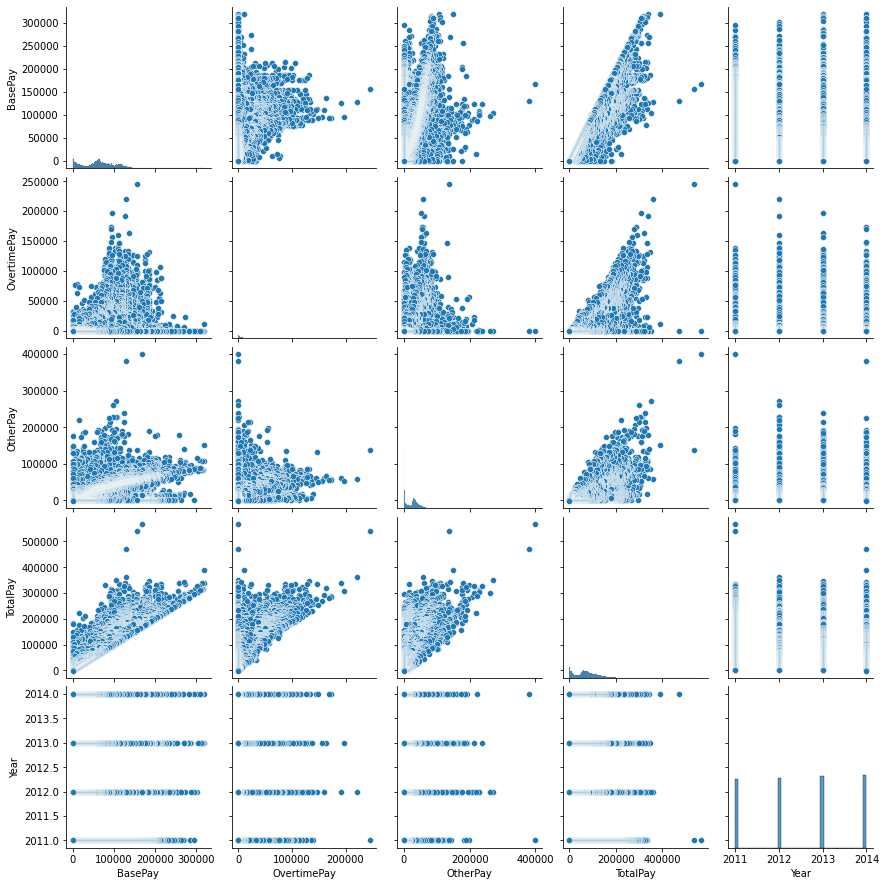

In [84]:
sns.pairplot(df)

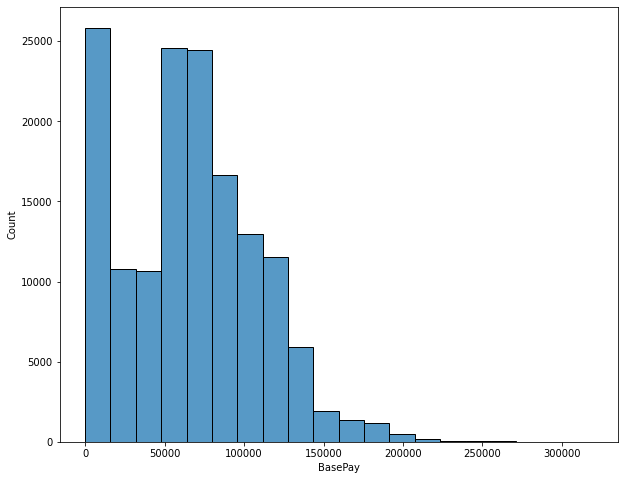

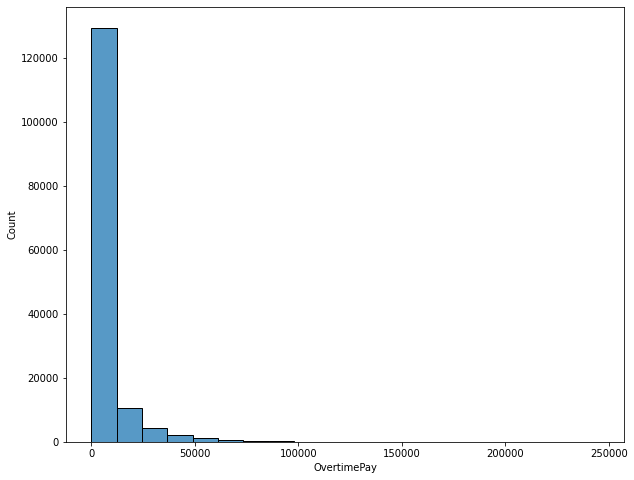

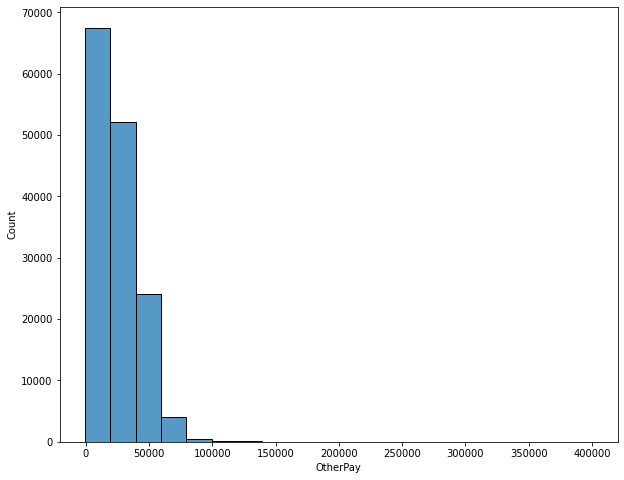

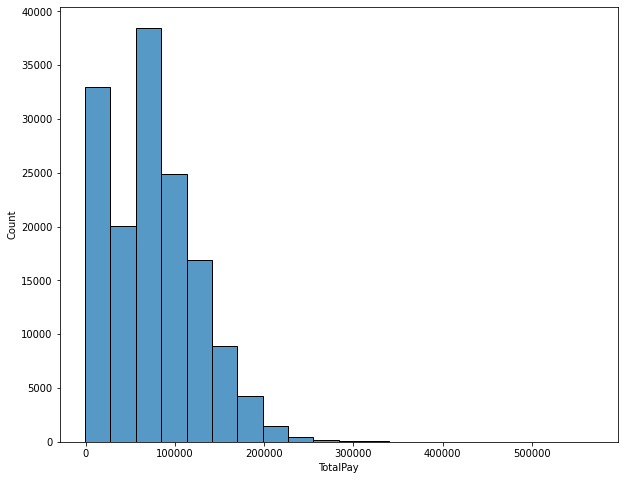

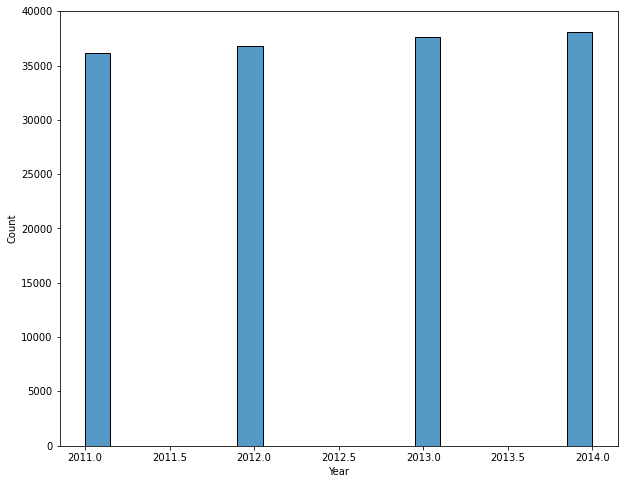

In [85]:
for i in num_var:
    plt.figure(figsize=(10,8))
    sns.histplot(df[i],kde=False,bins=20)

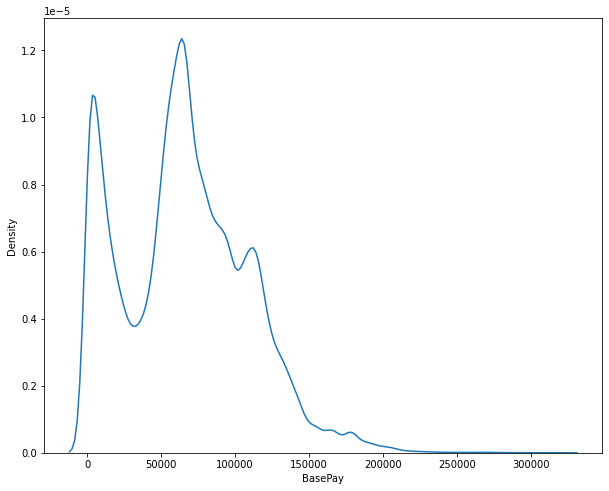

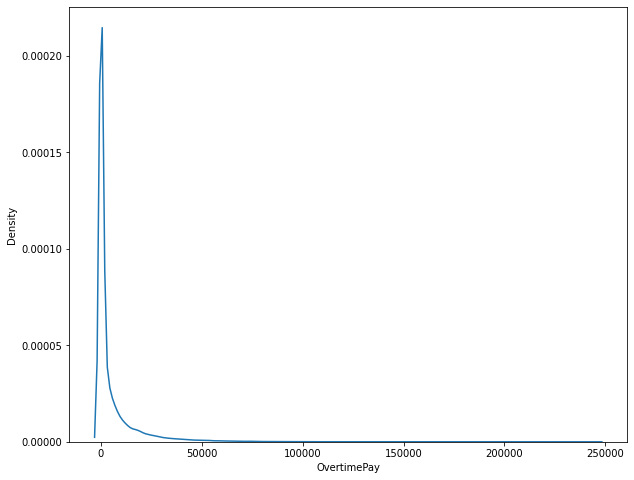

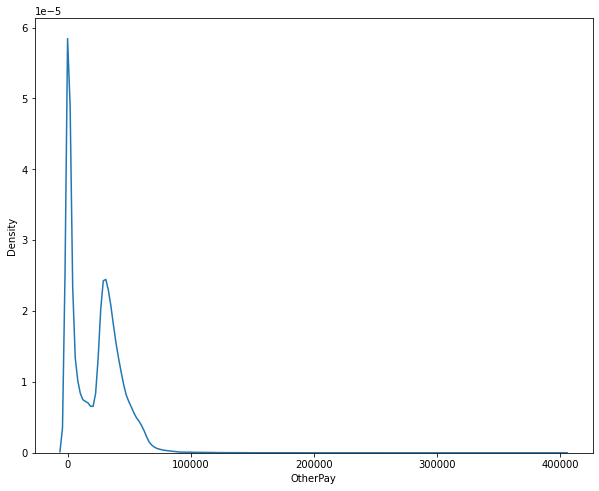

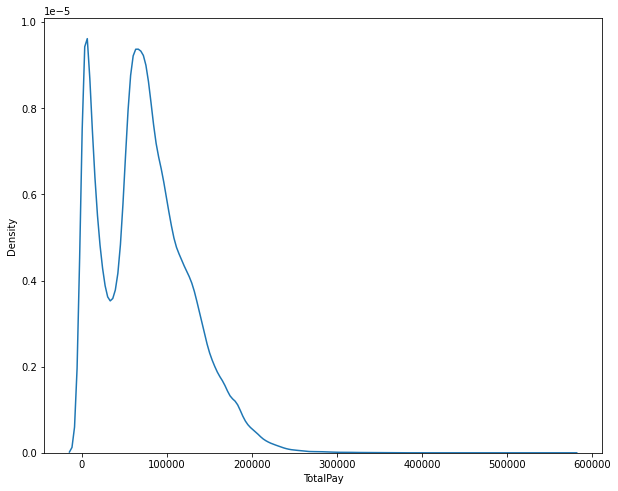

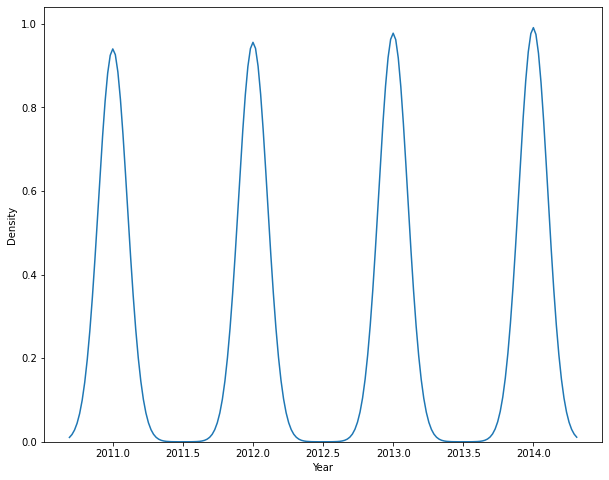

In [86]:
for i in num_var:
    plt.figure(figsize=(10,8))
    sns.kdeplot(x=df[i])

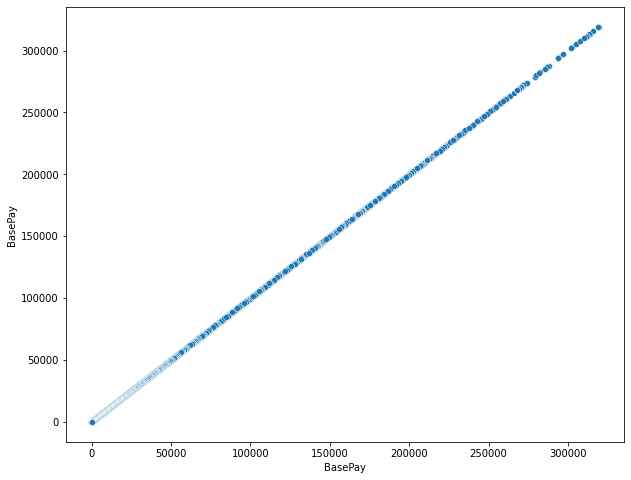

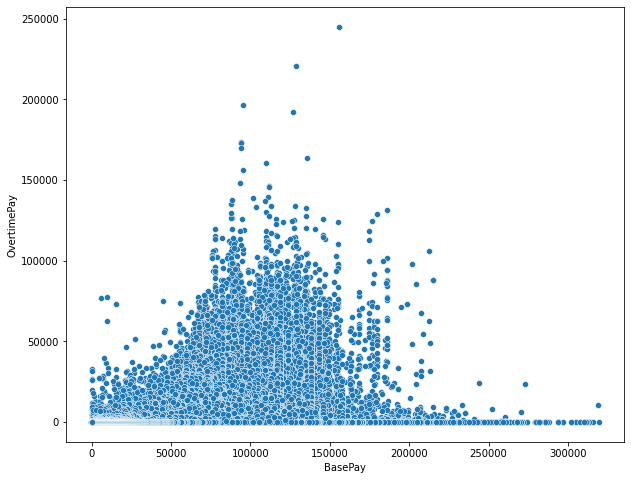

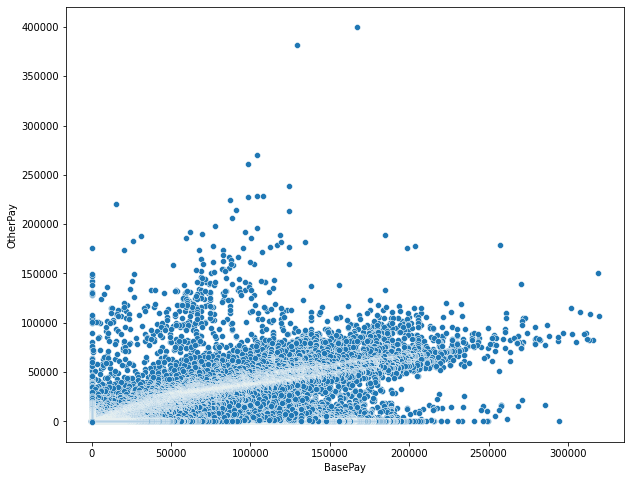

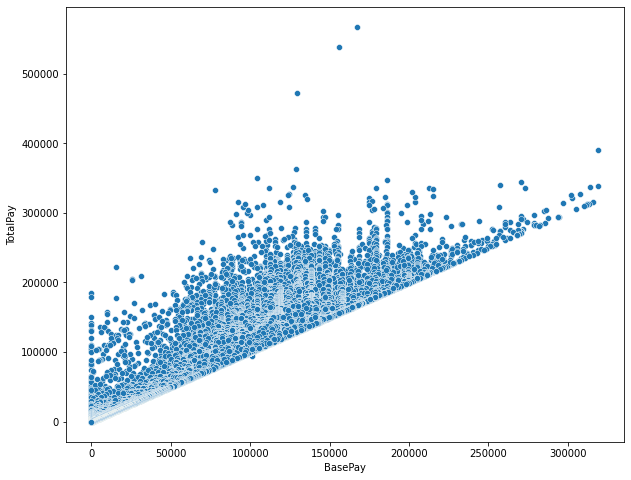

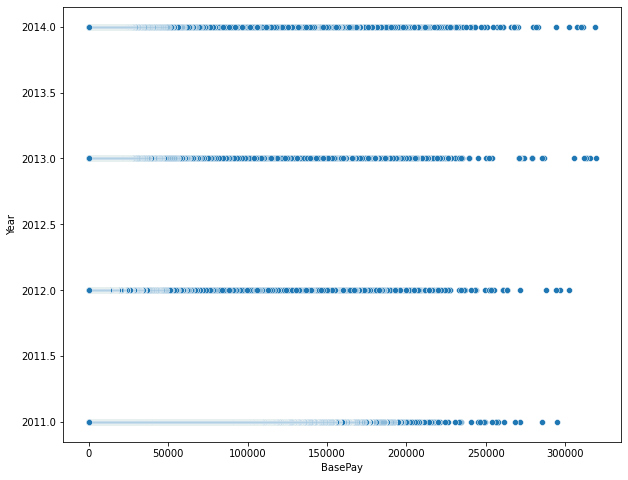

In [87]:
for i in num_var:
    plt.figure(figsize=(10,8))
    sns.scatterplot(x="BasePay",y=df[i],data=df)
    plt.show()